In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import reservoirpy as rpy
import math

from sklearn.model_selection import train_test_split
from IPython.display import display

# Se importan los datos del txt

In [85]:
# Importar los datos

# Guarda los nombres únicos de las primeras dos columnas.
index_col_names=['unit_id','time_cycle']
# Genera los nombres del primer set de columnas con formato, estas son las de operational setting n.
operat_set_col_names=['oper_set{}'.format(i) for i in range(1,4)]
# Genera los nombres del segundo set de columnas con formato, estas son las de sensor measurement n.
sensor_measure_col_names=['sm_{}'.format(i) for i in range(1,22)]
# Pone todos los títulos en una lista
all_col=index_col_names+operat_set_col_names+sensor_measure_col_names

# Importa los datos desde el .txt com su nombre de columna en un dataframe.
train_df=pd.read_csv('train.txt',delim_whitespace=True,names=all_col)
train_df

C:\Users\dave4\AppData\Local\Temp\ipykernel_25116\1475424004.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_df=pd.read_csv('train.txt',delim_whitespace=True,names=all_col)


,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.00,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.00,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.00,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.00,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.00,10.99,6.4025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,218,129,42.0066,0.8400,40.0,445.00,551.02,1365.27,1147.43,3.91,...,130.21,2387.39,8062.87,9.4672,0.02,333,2212,100.00,10.57,6.2985
45914,218,130,42.0029,0.8415,40.0,445.00,550.07,1365.55,1142.21,3.91,...,130.24,2387.28,8062.05,9.4619,0.02,332,2212,100.00,10.40,6.2741
45915,218,131,41.9999,0.8400,40.0,445.00,549.92,1359.21,1150.15,3.91,...,129.86,2387.33,8062.73,9.4827,0.02,334,2212,100.00,10.37,6.1978
45916,218,132,35.0007,0.8419,60.0,449.44,556.55,1380.05,1145.49,5.48,...,182.03,2387.56,8043.21,9.4212,0.02,337,2223,100.00,14.70,8.6761


# Calcular el tiempo hasta el fallo

In [86]:
# Primero se encuentra el ciclo de tiempo máximo para cada motor.

max_time_cycle=train_df.groupby('unit_id')['time_cycle'].max()

rul = pd.DataFrame(max_time_cycle).reset_index()
rul.columns = ['unit_id', 'max']

# Se calcula el RUL para cada fila con un id específico y se le resta al máximo.

train_df = train_df.merge(rul, on=['unit_id'], how='left')
train_df['RUL'] = train_df['time_cycle'] - train_df['max']
train_df.drop('max', axis=1, inplace=True)
train_df[train_df.unit_id==1].iloc[:,[1,-1]]
train_df

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,RUL
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,2388.13,8120.83,8.6216,0.03,368,2319,100.00,28.58,17.1735,-222
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,2388.15,8132.87,8.3907,0.03,391,2388,100.00,38.99,23.3619,-221
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,2387.95,8063.84,9.3557,0.02,334,2223,100.00,14.83,8.8555,-220
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,2388.07,8052.30,9.2231,0.02,364,2324,100.00,24.42,14.7832,-219
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,2387.89,8083.67,9.2986,0.02,330,2212,100.00,10.99,6.4025,-218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,218,129,42.0066,0.8400,40.0,445.00,551.02,1365.27,1147.43,3.91,...,2387.39,8062.87,9.4672,0.02,333,2212,100.00,10.57,6.2985,-4
45914,218,130,42.0029,0.8415,40.0,445.00,550.07,1365.55,1142.21,3.91,...,2387.28,8062.05,9.4619,0.02,332,2212,100.00,10.40,6.2741,-3
45915,218,131,41.9999,0.8400,40.0,445.00,549.92,1359.21,1150.15,3.91,...,2387.33,8062.73,9.4827,0.02,334,2212,100.00,10.37,6.1978,-2
45916,218,132,35.0007,0.8419,60.0,449.44,556.55,1380.05,1145.49,5.48,...,2387.56,8043.21,9.4212,0.02,337,2223,100.00,14.70,8.6761,-1


# Ver la correlación de los sensores

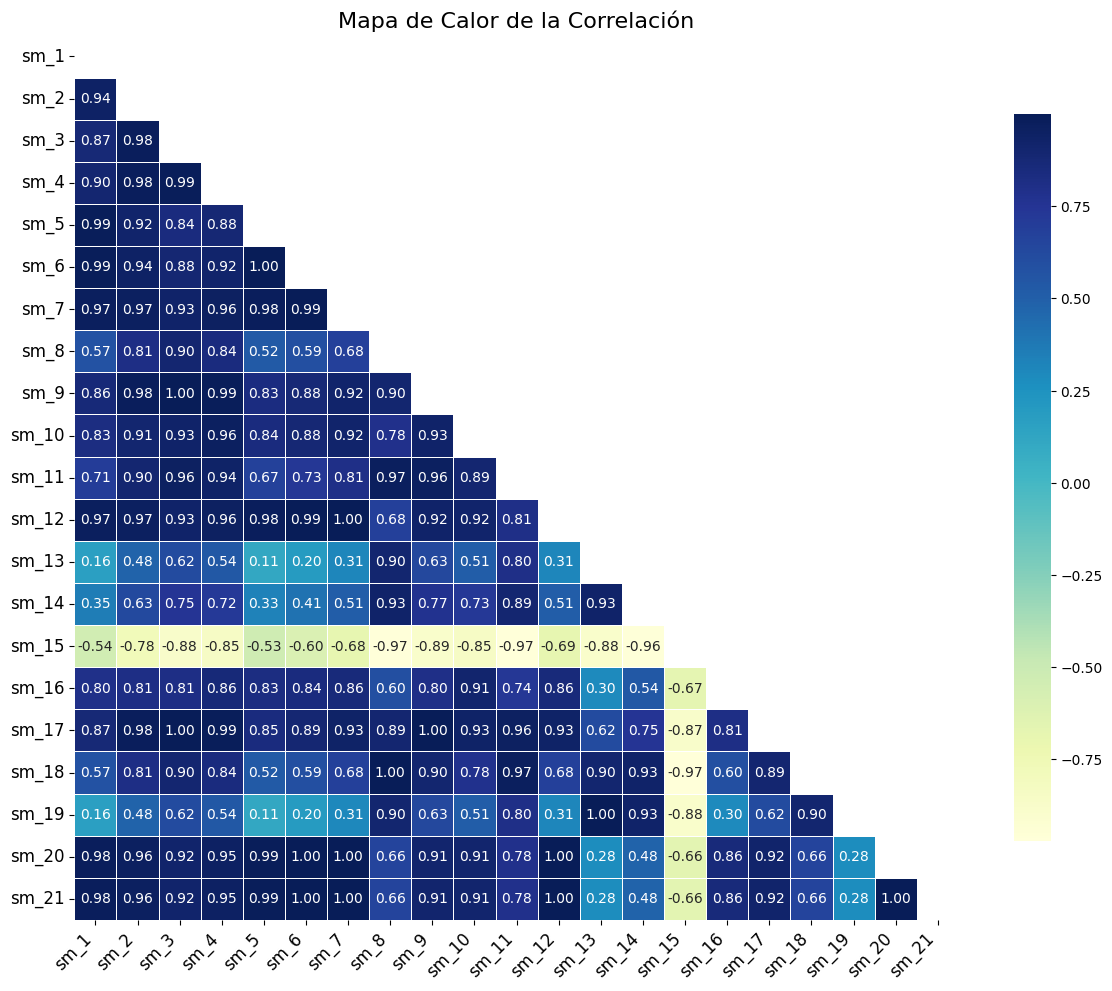

In [29]:
# Calcular la matriz de correlación

correlation_matrix = train_df.iloc[:,5:-1].corr()

# Crear una máscara para ocultar la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 10))

# Crear el mapa de calor con anotaciones
sns.heatmap(correlation_matrix, 
            mask=mask,  # Aplicar máscara
            annot=True,  # Mostrar valores de correlación
            fmt=".2f",  # Formato de los valores
            cmap="YlGnBu",  # Paleta de colores
            square=True,  # Celdas cuadradas
            linewidths=0.5,  # Espaciado entre celdas
            cbar_kws={"shrink": .8},  # Ajustar tamaño de la barra de color
            xticklabels=correlation_matrix.columns, 
            yticklabels=correlation_matrix.columns)

# Configurar etiquetas y título
plt.title('Mapa de Calor de la Correlación', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

##### Aquí se puede ver que los datos del sensor 15 es el que tiene menos correlación con el resto de los sensores

C:\Users\dave4\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dave4\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dave4\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

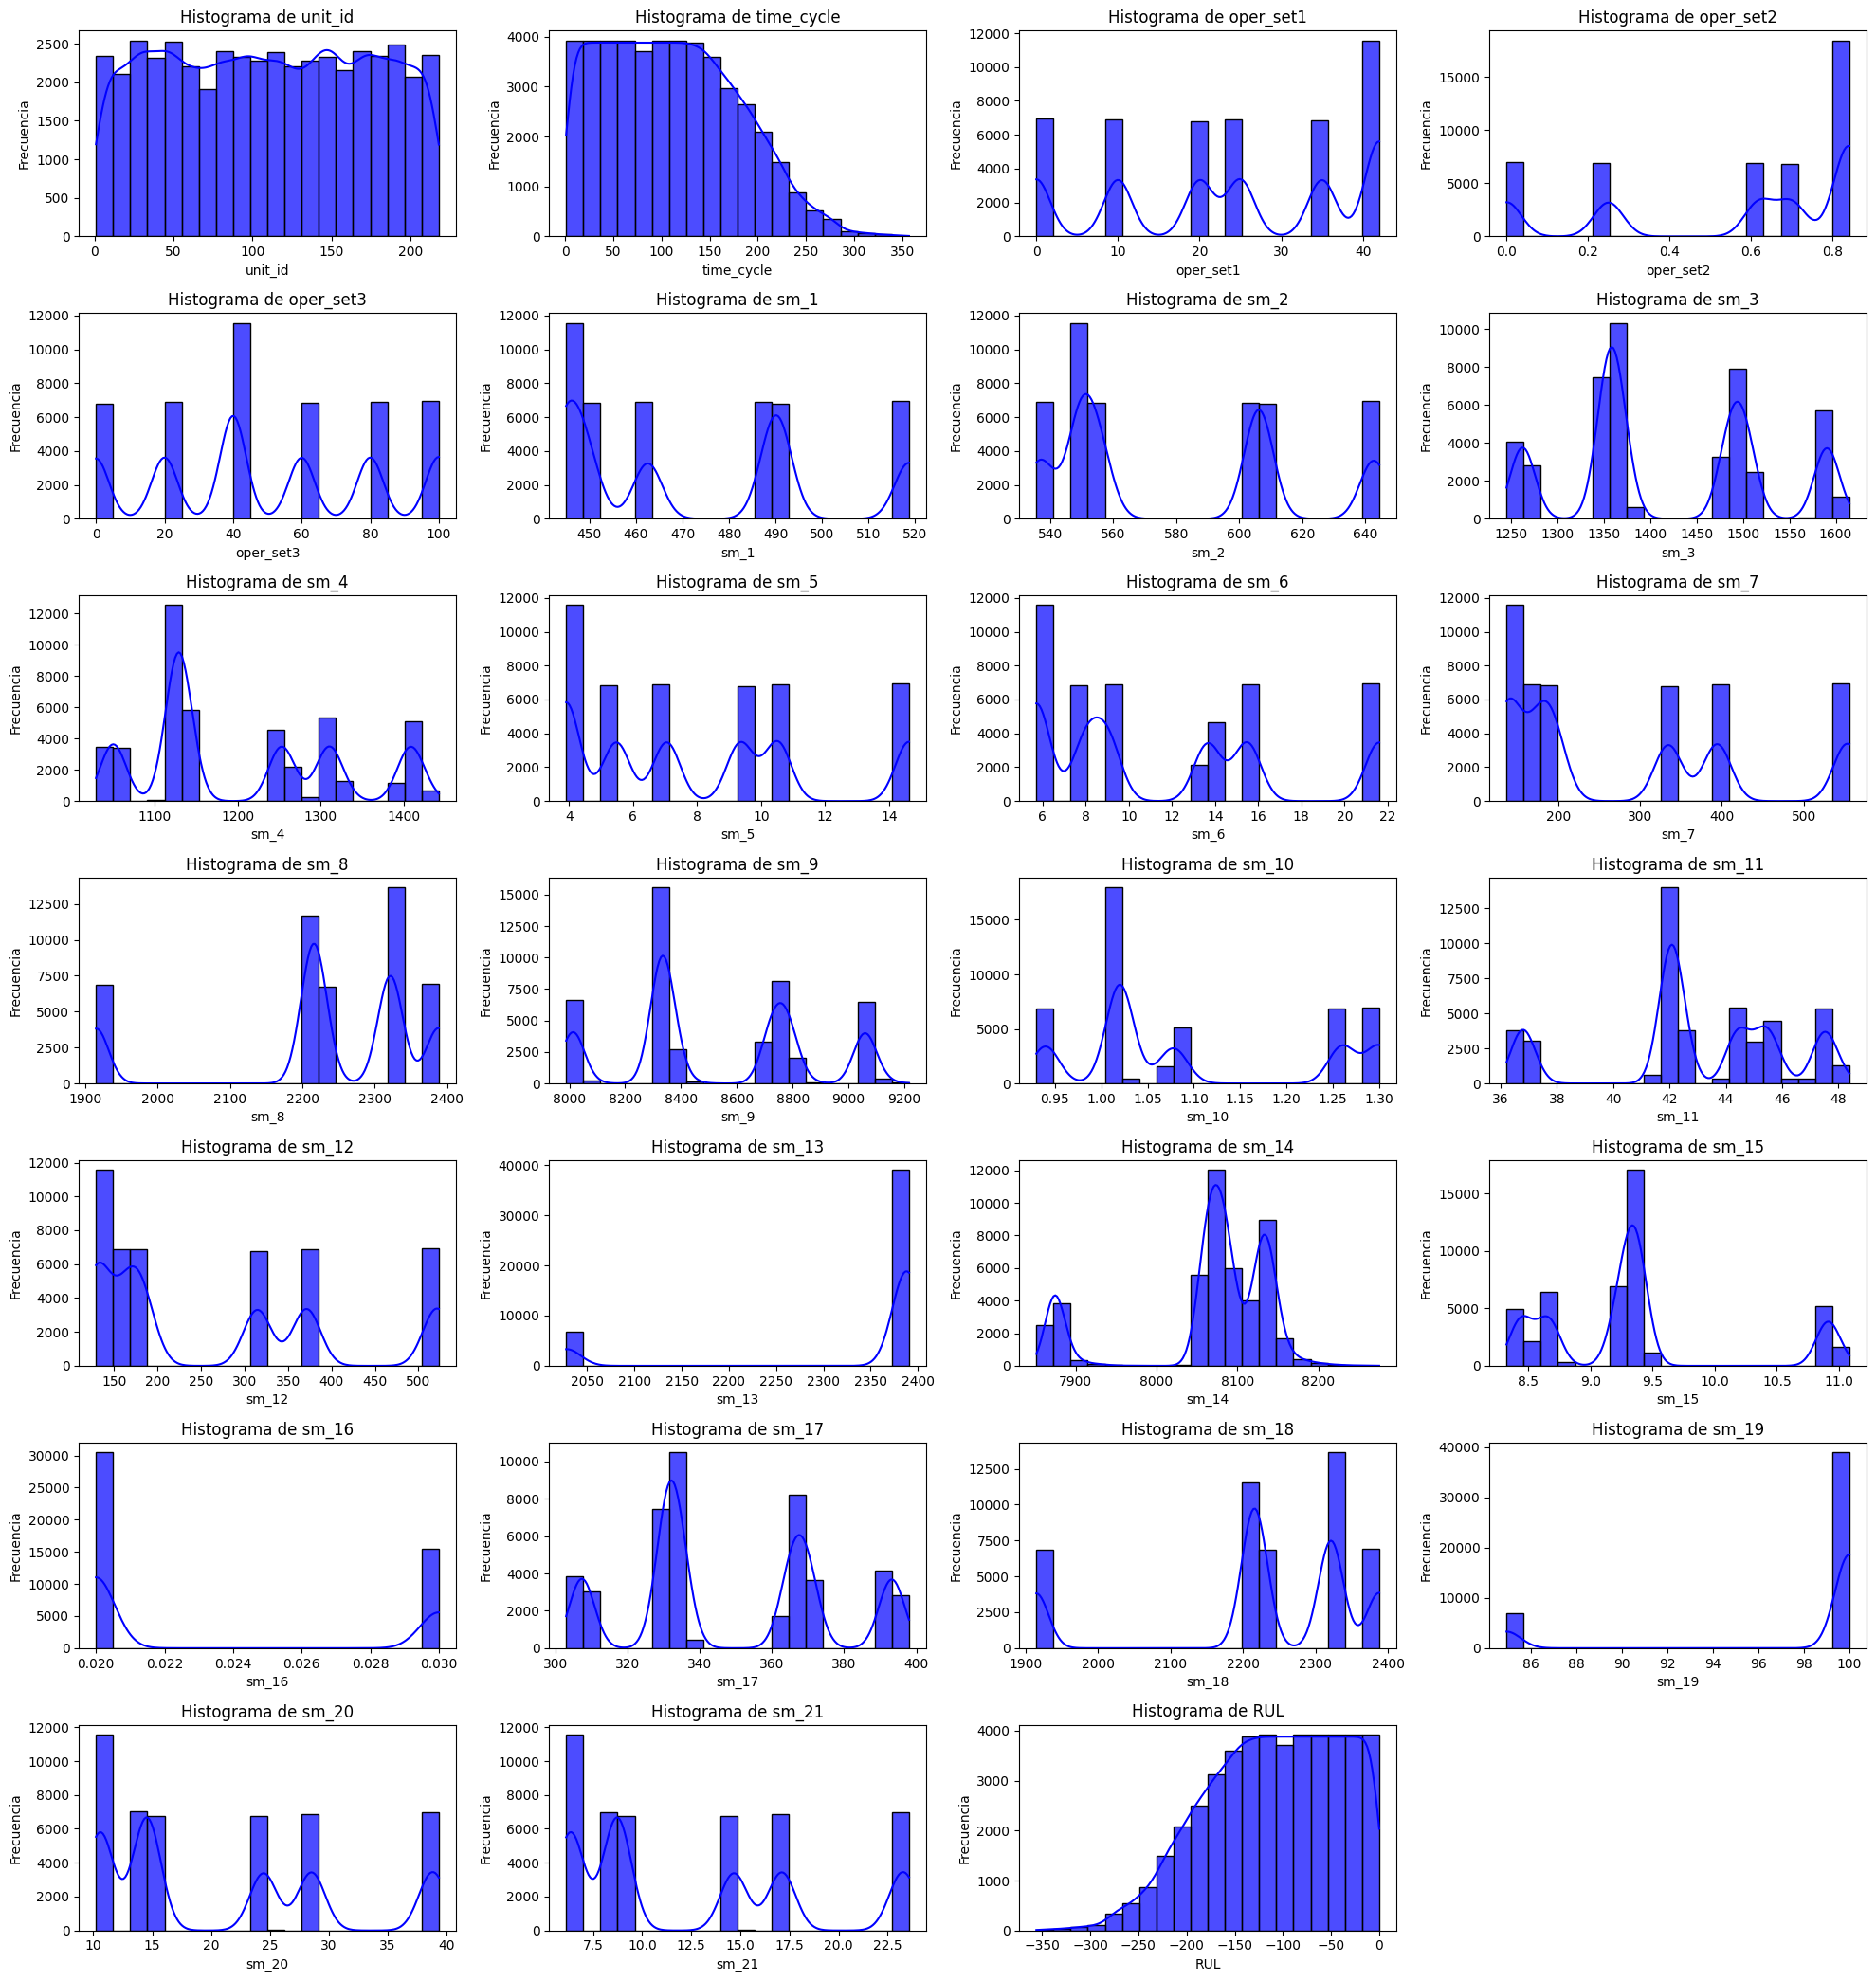

In [30]:
# Configurar el número de filas y columnas para los subgráficos
num_cols = 4  # Número de columnas en el layout
num_rows = len(train_df.columns) // num_cols + (len(train_df.columns) % num_cols > 0)  # Calcular el número de filas

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 3))  # Ajustar el tamaño de la figura

# Crear histogramas para cada columna usando seaborn
for i, col in enumerate(train_df.columns):
    row, col_pos = divmod(i, num_cols)  # Calcular la posición del subgráfico
    sns.histplot(train_df[col], bins=20, kde=True, ax=axs[row, col_pos], color='blue', alpha=0.7)  # Crear histograma
    axs[row, col_pos].set_title(f'Histograma de {col}')  # Título del histograma
    axs[row, col_pos].set_xlabel(col)  # Etiqueta del eje x
    axs[row, col_pos].set_ylabel('Frecuencia')  # Etiqueta del eje y

# Ajustar el layout
plt.tight_layout()

# Eliminar subgráficos vacíos si es necesario
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs.flatten()[j])

plt.show()  # Mostrar la figura

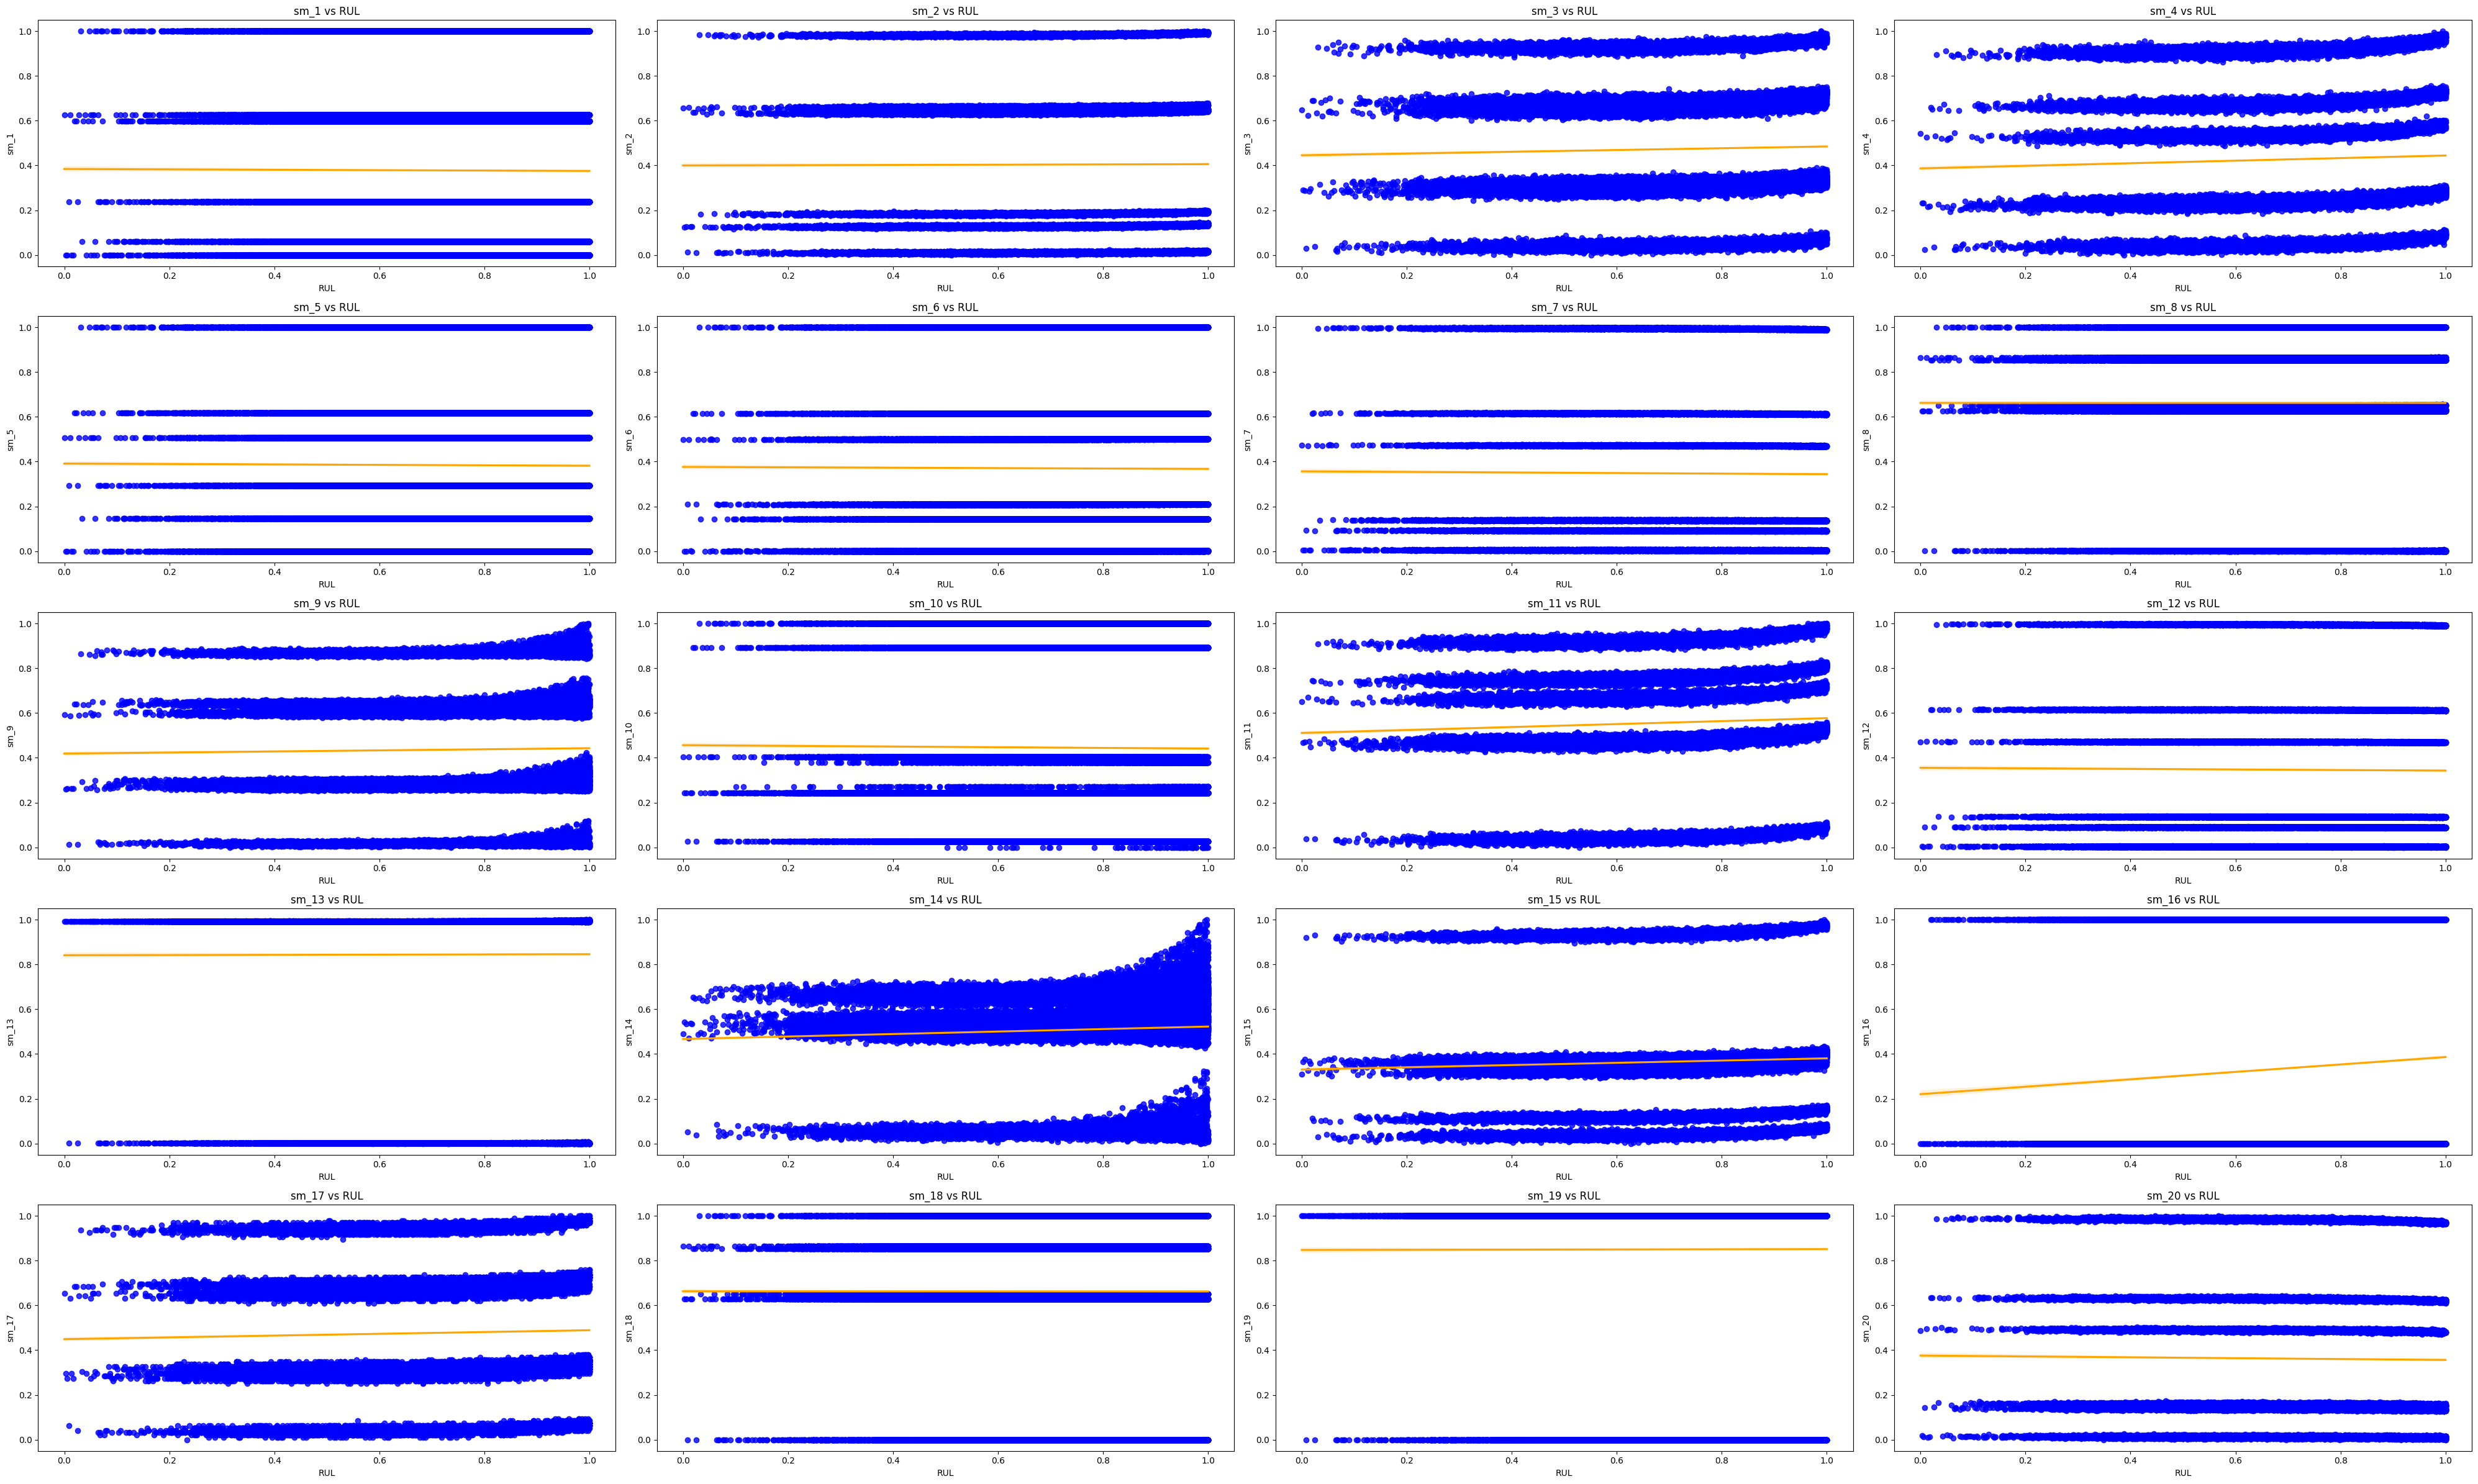

In [93]:
num_cols = 4  # Number of columns in the layout
num_rows = len(train_df.columns[5:-2]) // num_cols + (len(train_df.columns[5:-2]) % num_cols > 0)  # Calculate the number of rows

fig, axs = plt.subplots(num_rows, num_cols, figsize=(40, 24))  # Adjust figure size

# Create scatter plots for each sensor against RUL
for i, col in enumerate(train_df.columns[5:-2]):  # Exclude the RUL column
    row, col_pos = divmod(i, num_cols)  # Calculate the position of the subplot
    
    # Use seaborn's regplot to plot the scatter and trend line
    sns.regplot(x=train_df['RUL'], y=train_df[col], ax=axs[row, col_pos],
                scatter_kws={'color': 'blue', 'marker': 'o'},  # Scatter plot customization
                line_kws={'color': 'orange'})  # Trend line customization

    axs[row, col_pos].set_title(f'{col} vs RUL')  # Title of the plot
    axs[row, col_pos].set_xlabel('RUL')  # X-axis label
    axs[row, col_pos].set_ylabel(col)  # Y-axis label

# Adjust layout
plt.tight_layout()

# Remove empty subplots if necessary
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs.flatten()[j])

plt.show()  # Show the figure

##### Se puede observar que los sensores 19, 16 y 3 son los que tienen poca variación, por lo tanto aportan poco a la predicción

# Normalizar con respecto a los ciclos hasta el fallo

In [170]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def preprocess_data(df, feature_columns):
    """
    Preprocess the data by replacing NaN values and standardizing it.
    
    Parameters:
    - df: DataFrame containing the data
    - feature_columns: List of column indices to extract features

    Returns:
    - Processed feature array
    """
    # Extract relevant features from the DataFrame
    X = df.values[:, feature_columns]
    
    # Replace NaN values with zeros
    X = np.nan_to_num(X)
    
    return X

def perform_clustering(X, n_clusters=6, n_init=12):
    """
    Perform K-Means clustering on the dataset.
    
    Parameters:
    - X: Input feature array
    - n_clusters: Number of clusters to form
    - n_init: Number of time the K-Means algorithm will be run with different centroid seeds

    Returns:
    - labels: Cluster labels for each point in the dataset
    """
    # Create a pipeline for scaling and clustering
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(init="k-means++", n_clusters=n_clusters, n_init=n_init))
    ])
    
    # Fit the pipeline to the data
    pipeline.fit(X)
    
    return pipeline.named_steps['kmeans'].labels_

# Define the feature columns to use (2 to 4 inclusive, 0-indexed: 2 to 5)
feature_columns = slice(2, 5)

# Preprocess data
X_processed = preprocess_data(train_df, feature_columns)

# Perform clustering
train_df['Clus_op'] = perform_clustering(X_processed)

# Display the updated DataFrame with cluster information
train_df

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,RUL,Clus_op
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,8120.83,8.6216,0.03,368,2319,100.00,28.58,17.1735,-222,2
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,8132.87,8.3907,0.03,391,2388,100.00,38.99,23.3619,-221,0
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,8063.84,9.3557,0.02,334,2223,100.00,14.83,8.8555,-220,5
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,8052.30,9.2231,0.02,364,2324,100.00,24.42,14.7832,-219,4
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,8083.67,9.2986,0.02,330,2212,100.00,10.99,6.4025,-218,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,218,129,42.0066,0.8400,40.0,445.00,551.02,1365.27,1147.43,3.91,...,8062.87,9.4672,0.02,333,2212,100.00,10.57,6.2985,-4,1
45914,218,130,42.0029,0.8415,40.0,445.00,550.07,1365.55,1142.21,3.91,...,8062.05,9.4619,0.02,332,2212,100.00,10.40,6.2741,-3,1
45915,218,131,41.9999,0.8400,40.0,445.00,549.92,1359.21,1150.15,3.91,...,8062.73,9.4827,0.02,334,2212,100.00,10.37,6.1978,-2,1
45916,218,132,35.0007,0.8419,60.0,449.44,556.55,1380.05,1145.49,5.48,...,8043.21,9.4212,0.02,337,2223,100.00,14.70,8.6761,-1,5


In [171]:
norm_train_df = train_df

def standardize_sensors_by_cluster(df, sensor_columns):
    """
    Standardize sensor readings based on cluster assignments.

    Parameters:
    - df: DataFrame containing the sensor data with clusters
    - sensor_columns: List of sensor column names to standardize

    Returns:
    - df: DataFrame with standardized sensor values
    - scaled_features: Dictionary with mean and standard deviation for each sensor in each cluster
    """
    # Initialize dictionary to hold scaled features
    scaled_features = {}

    # Group by cluster and calculate mean and std for each sensor
    for cluster_id, group in df.groupby('Clus_op'):
        for sensor in sensor_columns:
            mean = group[sensor].mean()
            std = group[sensor].std()
            config_name = f"{sensor}_{cluster_id}"  # Create configuration name
            scaled_features[config_name] = [mean, std]  # Store mean and std in the dictionary

            # Standardize the sensor values
            df.loc[df['Clus_op'] == cluster_id, sensor] = (group[sensor] - mean) / std

    return df, scaled_features

# Create list of sensor names
sensor_columns = [f'sm_{i + 1}' for i in range(21)]  # Sensor names s1 to s21

# Standardize sensors based on cluster
norm_train_df, scaled_features = standardize_sensors_by_cluster(norm_train_df, sensor_columns)

# Display the updated dataset
norm_train_df


C:\Users\dave4\AppData\Local\Temp\ipykernel_22844\3000717381.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-1.52016031 -1.52016031 -0.84799176 ...  0.49634534  1.84068245
  1.84068245]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Clus_op'] == cluster_id, sensor] = (group[sensor] - mean) / std


,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,RUL,Clus_op
0,1,1,10.0047,0.2501,20.0,-0.999927,-1.665632,-0.460749,-0.168926,0.999927,...,-0.822667,-1.170261,-0.999927,-1.180982,NaN,NaN,0.377638,0.675882,-222,2
1,1,2,0.0015,0.0003,100.0,NaN,-1.201429,-1.040821,-0.626306,-0.999928,...,-0.472019,-1.468330,-0.999928,-1.520160,NaN,NaN,1.036511,0.735170,-221,0
2,1,3,34.9986,0.8401,60.0,0.999927,-0.920577,0.218738,-1.283192,-0.999927,...,-0.461147,0.550747,0.999927,-0.205342,NaN,NaN,0.022284,-0.595856,-220,5
3,1,4,20.0031,0.7005,0.0,0.999926,-1.212605,0.422369,-0.577304,0.999926,...,-0.817049,-0.314185,-0.548699,-1.005683,NaN,NaN,-0.202145,1.411592,-219,4
4,1,5,42.0041,0.8405,40.0,NaN,-0.456453,-0.034709,-0.513961,0.999957,...,-0.286493,-2.132310,NaN,-0.793917,NaN,NaN,3.771104,0.808162,-218,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,218,129,42.0066,0.8400,40.0,NaN,2.959902,1.870111,2.545405,0.999957,...,-1.536422,2.439727,NaN,1.334538,NaN,NaN,-0.126268,-0.823066,-4,1
45914,218,130,42.0029,0.8415,40.0,NaN,0.796211,1.919541,1.854367,0.999957,...,-1.585699,2.296003,NaN,0.625053,NaN,NaN,-1.703776,-1.205777,-3,1
45915,218,131,41.9999,0.8400,40.0,NaN,0.454575,0.800305,2.905486,0.999957,...,-1.544835,2.860051,NaN,2.044023,NaN,NaN,-1.982160,-2.402534,-2,1
45916,218,132,35.0007,0.8419,60.0,0.999927,1.651544,2.319518,1.833844,-0.999927,...,-1.785563,2.268745,0.999927,1.943856,NaN,NaN,-1.132928,-3.193209,-1,5


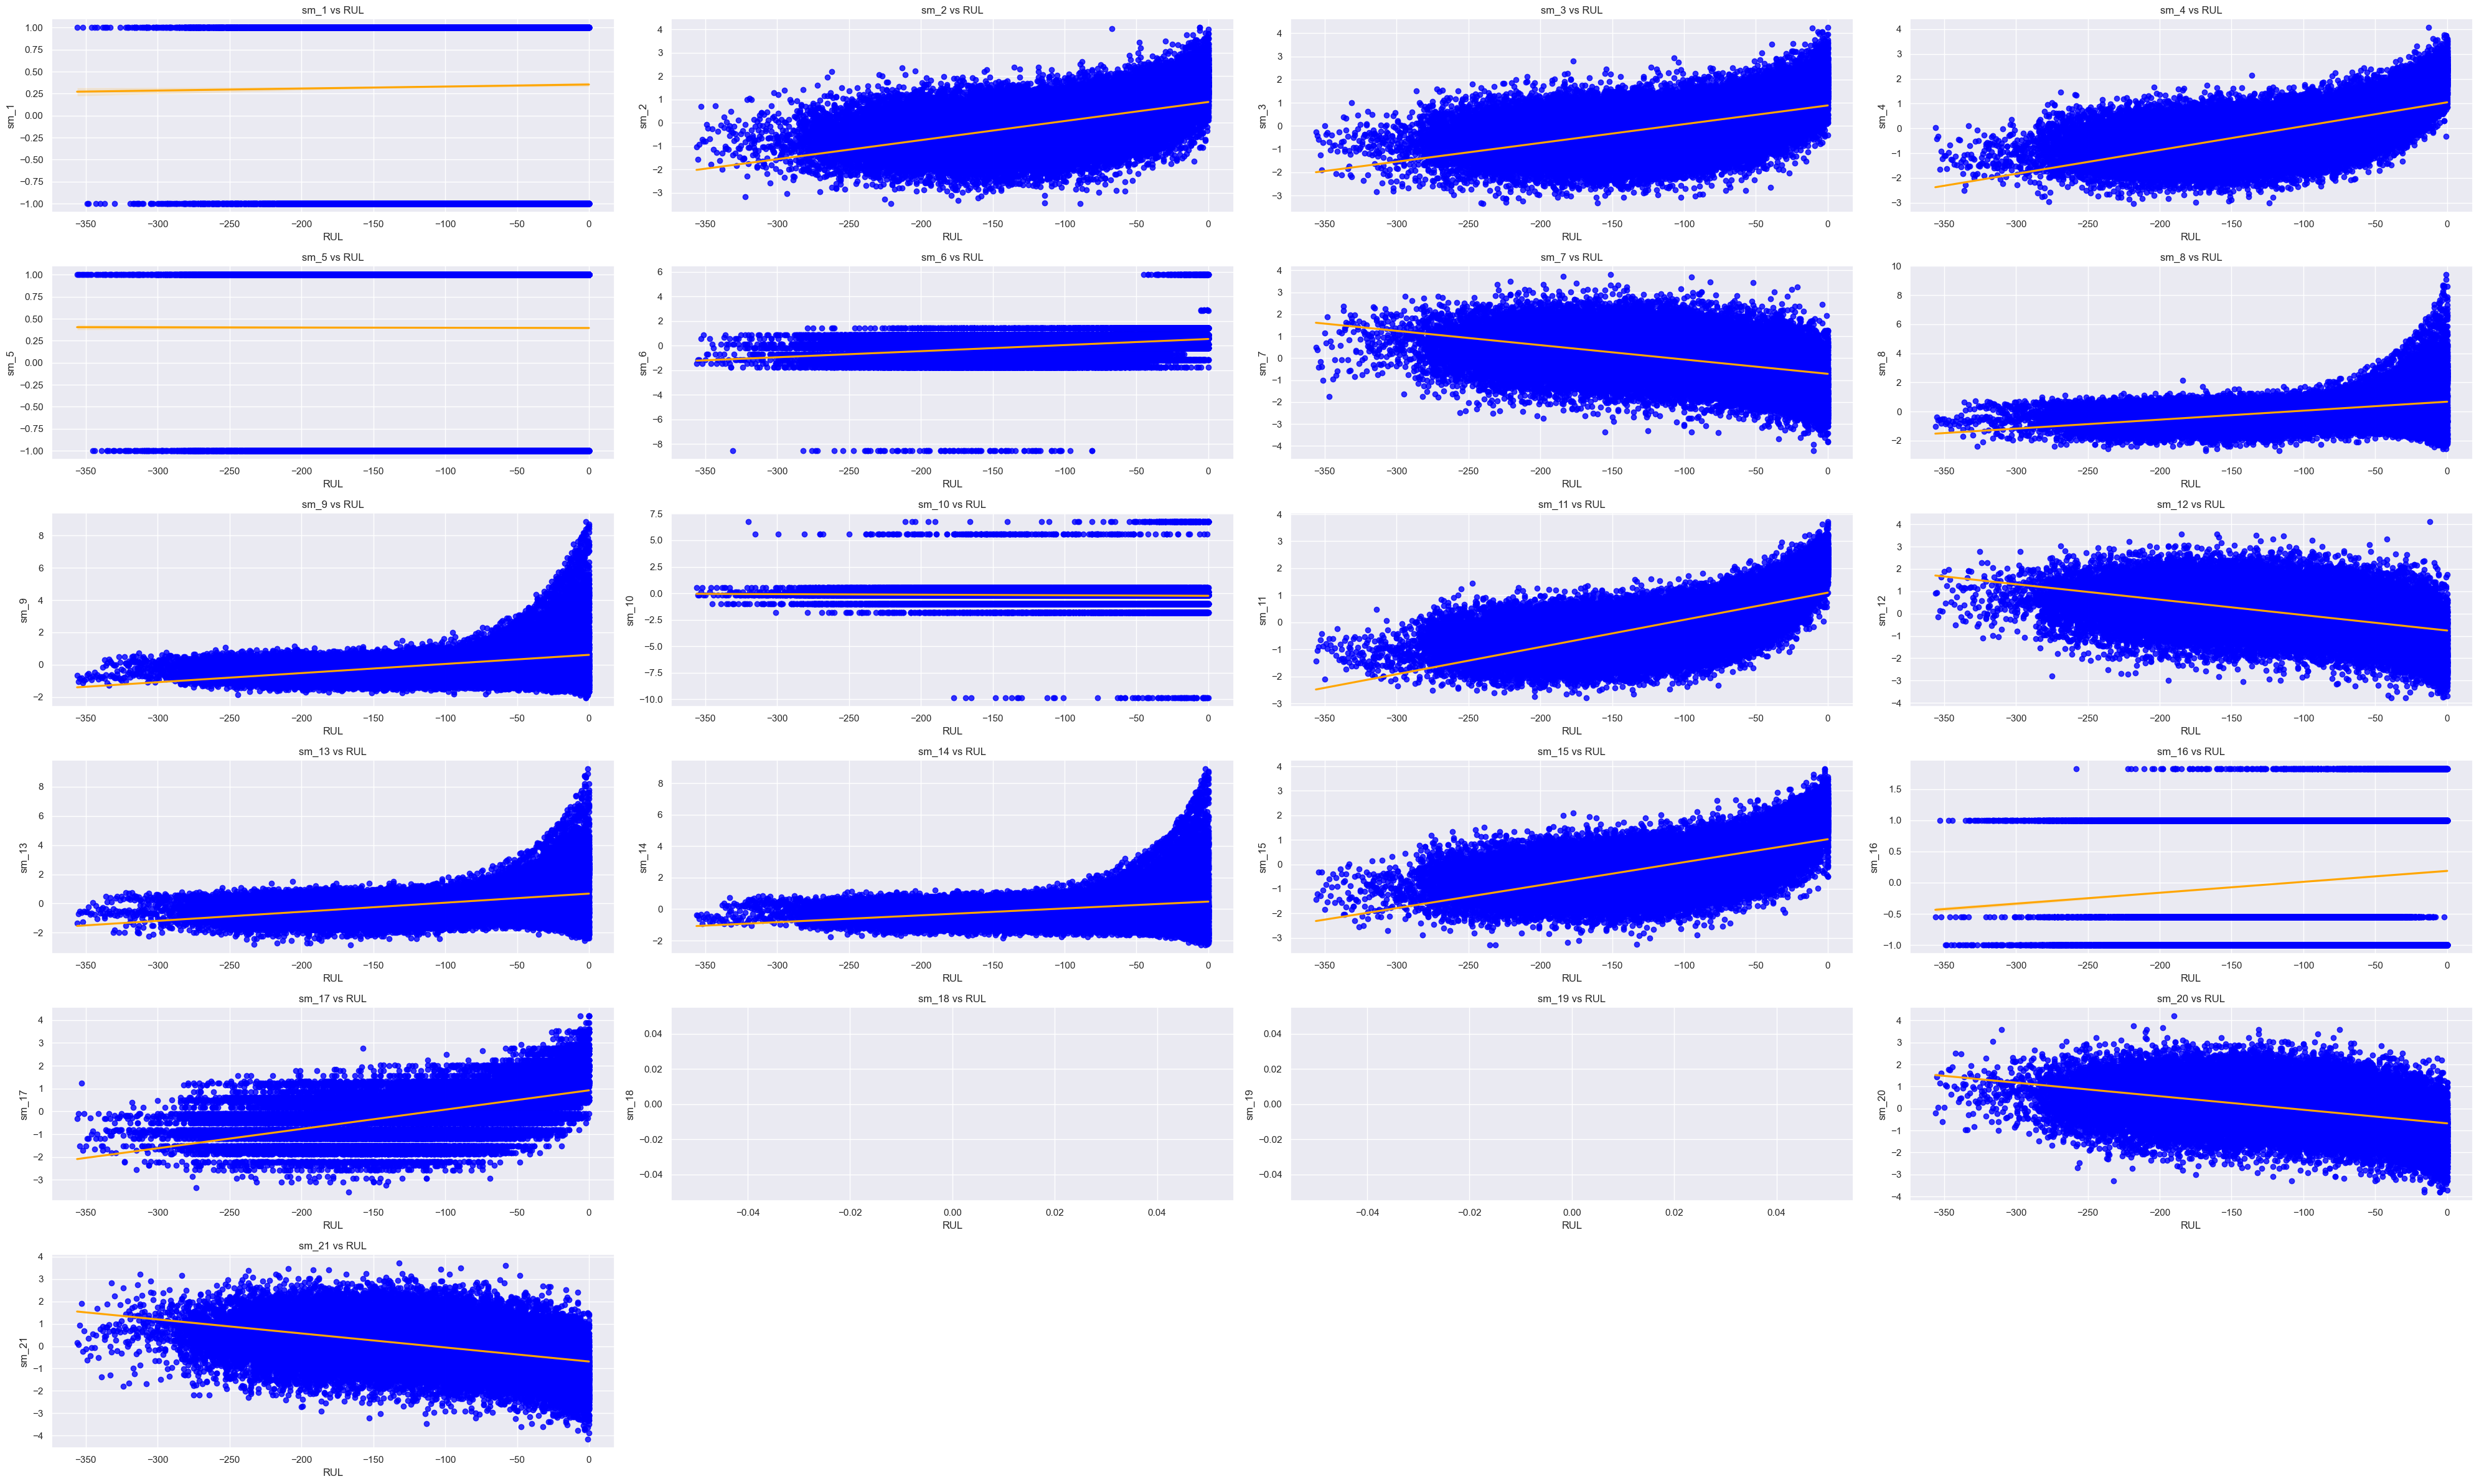

In [172]:
num_cols = 4  # Number of columns in the layout
num_rows = len(norm_train_df.columns[5:-2]) // num_cols + (len(norm_train_df.columns[5:-2]) % num_cols > 0)  # Calculate the number of rows

fig, axs = plt.subplots(num_rows, num_cols, figsize=(40, 24))  # Adjust figure size

# Create scatter plots for each sensor against RUL
for i, col in enumerate(norm_train_df.columns[5:-2]):  # Exclude the RUL column
    row, col_pos = divmod(i, num_cols)  # Calculate the position of the subplot
    
    # Use seaborn's regplot to plot the scatter and trend line
    sns.regplot(x=norm_train_df['RUL'], y=norm_train_df[col], ax=axs[row, col_pos],
                scatter_kws={'color': 'blue', 'marker': 'o'},  # Scatter plot customization
                line_kws={'color': 'orange'})  # Trend line customization

    axs[row, col_pos].set_title(f'{col} vs RUL')  # Title of the plot
    axs[row, col_pos].set_xlabel('RUL')  # X-axis label
    axs[row, col_pos].set_ylabel(col)  # Y-axis label

# Adjust layout
plt.tight_layout()

# Remove empty subplots if necessary
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs.flatten()[j])

plt.show()  # Show the figure

##### En estos gráficos se ve que los sensores 1, 5, 6 ,10 y 16 no tienen ninguna tendencia aparante hacia el final de la vida del motor.
##### Mientras que los sensores 18 y 19 no muestran nada al ser normalizados por la técnica de cluster scaling, por esto estos se van a eliminar.

In [87]:
# Drop specified columns in place

#train_df_copy.drop(columns=['sm_1', 'sm_5', 'sm_6', 'sm_10', 'sm_16', 'sm_18', 'sm_19'], inplace=True)
data_df = train_df.drop(columns=['sm_1', 'sm_5', 'sm_6', 'sm_10', 'sm_16', 'sm_18', 'sm_19'])
data_df



,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_14,sm_15,sm_17,sm_20,sm_21,RUL
0,1,1,10.0047,0.2501,20.0,604.13,1499.45,1309.95,394.88,2318.87,8770.20,45.40,372.15,2388.13,8120.83,8.6216,368,28.58,17.1735,-222
1,1,2,0.0015,0.0003,100.0,642.13,1584.55,1403.96,553.67,2388.01,9045.76,47.29,521.81,2388.15,8132.87,8.3907,391,38.99,23.3619,-221
2,1,3,34.9986,0.8401,60.0,555.42,1368.17,1122.49,194.93,2222.86,8343.91,41.92,183.26,2387.95,8063.84,9.3557,334,14.83,8.8555,-220
3,1,4,20.0031,0.7005,0.0,607.03,1488.44,1249.18,334.82,2323.85,8721.53,44.26,314.84,2388.07,8052.30,9.2231,364,24.42,14.7832,-219
4,1,5,42.0041,0.8405,40.0,549.52,1354.48,1124.32,138.24,2211.80,8314.56,41.79,130.44,2387.89,8083.67,9.2986,330,10.99,6.4025,-218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,218,129,42.0066,0.8400,40.0,551.02,1365.27,1147.43,137.97,2211.33,8303.20,42.68,130.21,2387.39,8062.87,9.4672,333,10.57,6.2985,-4
45914,218,130,42.0029,0.8415,40.0,550.07,1365.55,1142.21,137.56,2211.29,8302.69,42.62,130.24,2387.28,8062.05,9.4619,332,10.40,6.2741,-3
45915,218,131,41.9999,0.8400,40.0,549.92,1359.21,1150.15,138.05,2211.24,8309.41,42.83,129.86,2387.33,8062.73,9.4827,334,10.37,6.1978,-2
45916,218,132,35.0007,0.8419,60.0,556.55,1380.05,1145.49,194.59,2222.54,8330.67,42.61,182.03,2387.56,8043.21,9.4212,337,14.70,8.6761,-1


# Índice de salud con sensores fusionados

C:\Users\dave4\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


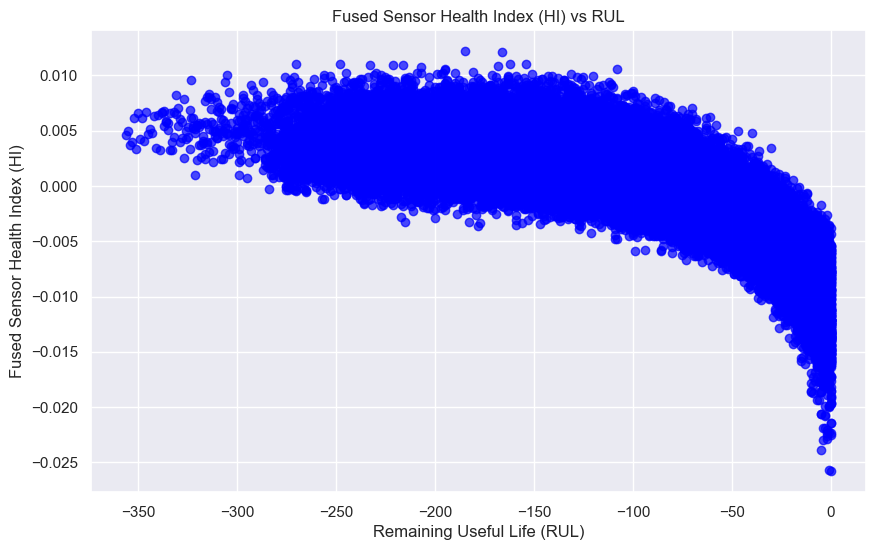

In [189]:
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

sensor_data = norm_train_df.drop(['unit_id', 'time_cycle', 'oper_set1', 'oper_set2', 'oper_set3', 'RUL', 'Clus_op'], axis=1)  # Filtrar columnas relevantes.

# Asignar el dataset sin columnas innecesarias a X.
X = sensor_data
scaler = StandardScaler()
sensors_scaled = scaler.fit_transform(sensor_data)

# Apply ICA with one component
ica = FastICA(n_components=1, random_state=0)
fused_sensor_health_index = ica.fit_transform(sensors_scaled)

# Add the FSHI as a new column in the DataFrame
norm_train_df['HI'] = fused_sensor_health_index

# Plot the FSHI against RUL
plt.figure(figsize=(10, 6))
plt.scatter(norm_train_df['RUL'], norm_train_df['HI'], color='blue', alpha=0.7)
plt.title("Fused Sensor Health Index (HI) vs RUL")
plt.xlabel("Remaining Useful Life (RUL)")
plt.ylabel("Fused Sensor Health Index (HI)")
plt.grid(True)
plt.show()

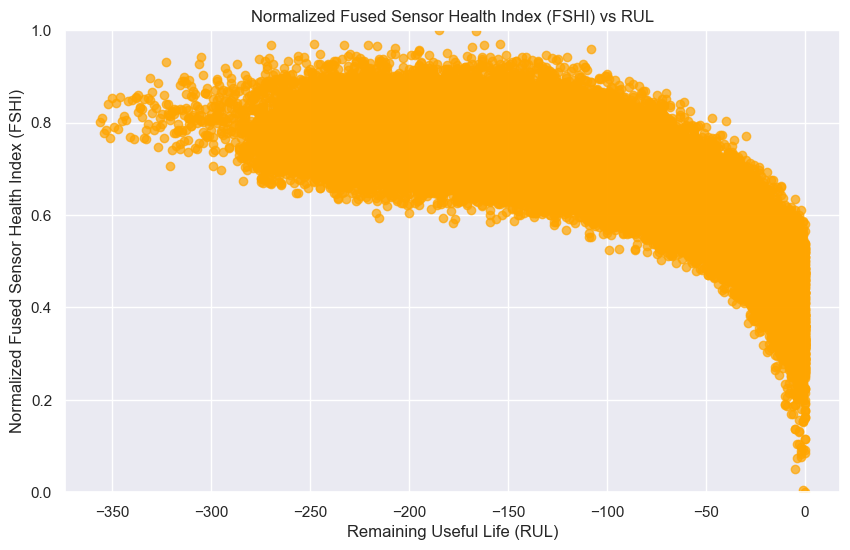

In [191]:
min_fshi = norm_train_df['HI'].min()
max_fshi = norm_train_df['HI'].max()
norm_train_df['HI_normalized'] = (norm_train_df['HI'] - min_fshi) / (max_fshi - min_fshi)

# Plot the normalized FSHI against RUL
plt.figure(figsize=(10, 6))
plt.scatter(norm_train_df['RUL'], norm_train_df['HI_normalized'], color='orange', alpha=0.7)
plt.title("Normalized Fused Sensor Health Index (FSHI) vs RUL")
plt.xlabel("Remaining Useful Life (RUL)")
plt.ylabel("Normalized Fused Sensor Health Index (FSHI)")
plt.ylim(0, 1)  # Ensure the y-axis is between 0 and 1
plt.grid(True)
plt.show()

# Calcular el score del challenge

In [71]:
def phm08_score(true_rul, predicted_rul):
    """
    Calculate the PHM08 score for a set of true and predicted RUL values.
    
    Parameters:
    - true_rul: Array-like of true RUL values
    - predicted_rul: Array-like of predicted RUL values
    
    Returns:
    - score: Calculated PHM08 score
    """
    # Convert to arrays if not already
    score = 0
    true_rul = np.array(true_rul)
    predicted_rul = np.array(predicted_rul)
    
    for true, predict in zip(true_rul, predicted_rul):
        
        if(predict-true<0):
            score = score + (np.exp(-(predict - true) / 13) - 1)
        else:
            score = score + (np.exp((predict - true) / 10) - 1)
            
    return score

In [88]:
train_stats = train_df['RUL'].describe().transpose()

def norm(x, stats):
    return((x-stats['min'])/(stats['max']-stats['min'])) #min-max norm

def reverse_norm(x):
    return(x*(train_stats['max']-train_stats['min'])+train_stats['min'])

train_df = norm(train_df, train_df.describe().transpose())
train_stats

count    45918.000000
mean      -109.307396
std         68.420545
min       -356.000000
25%       -159.000000
50%       -105.000000
75%        -52.000000
max          0.000000
Name: RUL, dtype: float64

# Separar los datos en training y validation

In [89]:
# Separar los datos por ID.
unit_ids = train_df['unit_id'].unique()

# Se hacen dos grupos de datos, 80% test y 20% validación
train_engines, val_engines = train_test_split(unit_ids, test_size=0.2, random_state=42)

# Se acomodan los datos por ID
train_data = train_df[train_df['unit_id'].isin(train_engines)]
val_data = train_df[train_df['unit_id'].isin(val_engines)]

# Se quitan los IDs de los datos

train_data.pop('unit_id')
val_data.pop('unit_id')

# Se separan los labels de los set de datos de entrenamiento y validación

train_data = train_data.drop(columns=['time_cycle', 'oper_set1', 'oper_set2', 'oper_set3']) #, 'sm_1', 'sm_5', 'sm_6', 'sm_10', 'sm_16', 'sm_18', 'sm_19'
val_data = val_data.drop(columns=['time_cycle', 'oper_set1', 'oper_set2', 'oper_set3'])

train_label = train_data.pop('RUL')
val_label = val_data.pop('RUL')

val_data

,sm_1,sm_2,sm_3,sm_4,sm_5,sm_6,sm_7,sm_8,sm_9,sm_10,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
1903,0.626985,0.659864,0.643718,0.523288,0.507937,0.499371,0.472659,0.863889,0.601072,0.405405,...,0.471361,0.992562,0.493302,0.312008,0.0,0.652632,0.864693,1.0,0.487629,0.500764
1904,0.626985,0.660967,0.644937,0.525347,0.507937,0.499371,0.473399,0.863825,0.591154,0.405405,...,0.472046,0.992673,0.498311,0.310122,0.0,0.642105,0.864693,1.0,0.491409,0.496813
1905,1.000000,0.979776,0.932942,0.910432,1.000000,1.000000,0.996205,0.999197,0.861965,1.000000,...,0.995815,0.992507,0.662359,0.025750,1.0,0.936842,1.000000,1.0,0.980756,0.986469
1906,0.060269,0.183214,0.312001,0.227481,0.146592,0.144025,0.137552,0.650694,0.299432,0.243243,...,0.135711,0.992617,0.520093,0.352664,0.0,0.315789,0.651163,1.0,0.156701,0.162232
1907,1.000000,0.978029,0.919969,0.909778,1.000000,1.000000,0.994319,0.999366,0.865588,1.000000,...,0.995282,0.992700,0.678258,0.032713,1.0,0.926316,1.000000,1.0,0.983849,0.981671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45493,0.238089,0.017283,0.065677,0.091578,0.293184,0.208805,0.090937,0.001964,0.043181,0.027027,...,0.089493,0.002562,0.106664,0.958945,0.0,0.063158,0.000000,0.0,0.142268,0.135388
45494,0.626985,0.668321,0.664626,0.572238,0.507937,0.500000,0.470201,0.864649,0.620915,0.378378,...,0.469636,0.993719,0.537764,0.352374,1.0,0.673684,0.864693,1.0,0.485567,0.481479
45495,0.597937,0.643133,0.715543,0.735316,0.617180,0.615723,0.612454,0.853794,0.676823,0.891892,...,0.611511,0.993444,0.704741,0.155297,1.0,0.726316,0.854123,1.0,0.625086,0.615807
45496,1.000000,0.996139,0.960973,0.972970,1.000000,1.000000,0.989259,0.999810,0.900227,1.000000,...,0.989574,0.993141,0.739115,0.061111,1.0,0.989474,1.000000,1.0,0.968041,0.967075


In [ ]:
# Se sacan solo los datos de los sensores
#train_data = train_data.drop(['time_cycle', 'oper_set1', 'oper_set2', 'oper_set3'], axis=1)  # Filtrar columnas relevantes.
#val_data = val_data.drop(['time_cycle', 'oper_set1', 'oper_set2', 'oper_set3'], axis=1)  # Filtrar columnas relevantes.

#Se normalizan los datos
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#train_data = scaler.fit_transform(train_data)
#val_data = scaler.fit_transform(val_data)

#train_label = scaler.fit_transform(train_label)
#val_label = scaler.fit_transform(val_label)

#train_data = pd.DataFrame(train_data)
#val_data = pd.DataFrame(val_data)

In [90]:

# Los dataframes se convierten en arreglos de numpy
X_train = train_data.values  # (n_samples, n_features)
y_train = train_label.values.flatten()  # (n_samples)

time_steps = 200  # Longitud de la secuencia temporal

# Se crean las secuencias para los features y el label
X_train_seq = []
y_train_seq = []

for i in range(len(X_train) - time_steps):
    X_train_seq.append(X_train[i:i + time_steps]) # Secuencia de features
    y_train_seq.append(y_train[i + time_steps])  # El label para el siguiente paso de tiempo

X_train_seq = np.array(X_train_seq)  # (n_samples, time_steps, n_features)
y_train_seq = np.array(y_train_seq)  # (n_samples,)

# Se cambia la forma de los datos de entrada
n_samples = X_train_seq.shape[0]
X_train_flat = X_train_seq.reshape(n_samples, -1)  # (n_samples, time_steps * n_features)

#se vuelve a convertir las labels en una columna
y_train_seq = y_train_seq.reshape(-1, 1)

# Se hace lo mismo para el set de validación

X_val = val_data.values
y_val = val_label.values.flatten()

X_val_seq = []
y_val_seq = []

for i in range(len(X_val) - time_steps):
    X_val_seq.append(X_val[i:i + time_steps])
    y_val_seq.append(y_val[i + time_steps])

X_val_seq = np.array(X_val_seq)
y_val_seq = np.array(y_val_seq)

n_samples = X_val_seq.shape[0]
X_val_flat = X_val_seq.reshape(n_samples, -1)

y_val_seq = y_val_seq.reshape(-1, 1)

# Modelo

In [75]:
# primero se crea un reservoir

from reservoirpy.nodes import Reservoir, Ridge, Input

# Se definen los parámetros

#leaking rate
lr = 0.6571588388986349

#spectral radius
sr = 3.650312480403175e-05

#cant de neuronas
units = 150

#ridge
ridge = 1.0243845988173443

# Se crea la capa de datos 
data = Input()

# Se crea el resevoir y ridge del modelo
reservoir = Reservoir(units, lr, sr, input_scaling=1.0, seed=1234)
readout = Ridge(ridge=ridge)

reservoir <<= readout #conexión entre la salida y el reservoir (feedback)
esn_model = data >> reservoir >> readout & data >> readout

In [91]:
# Entrenamiento del modelo

try:
    esn_model.fit(X_train_flat, y_train_seq, force_teachers=True)
    print("Modelo entrenado exitosamente.")
except Exception as e:
    print("Error al entrenar el modelo:", e)

# Verificar el estado de inicialización
print(reservoir.is_initialized, readout.is_initialized)

Running Model-28: 36220it [00:10, 3373.77it/s]?, ?it/s]
Running Model-28: 100%|██████████| 1/1 [00:14<00:00, 14.37s/it]


Fitting node Ridge-7...
Modelo entrenado exitosamente.
True True


Running Model-28: 9298it [00:02, 3263.85it/s]          


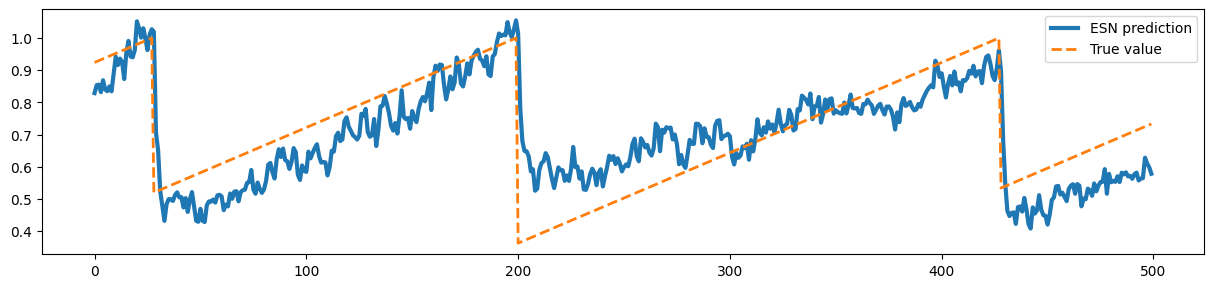

[75.42864717]
1705.8135263120128


In [92]:
# Hacer Predicciones
from reservoirpy.observables import nrmse, rsquare, mse

def plot_results(y_pred, y_test, sample=500):

    fig = plt.figure(figsize=(15, 7))
    plt.subplot(211)
    plt.plot(np.arange(sample), y_pred[:sample], lw=3, label="ESN prediction")
    plt.plot(np.arange(sample), y_test[:sample], linestyle="--", lw=2, label="True value")
    plt.legend()
    plt.show()
    
y_pred = esn_model.run(X_val_flat, forced_feedbacks=y_val_seq)
y_test = y_val_seq

plot_results(y_pred, y_test)
rsquare(y_test, y_pred), nrmse(y_test, y_pred), mse(y_test, y_pred)

print(phm08_score(y_test, y_pred))

from reservoirpy.observables import mse

# Se desnormalizan las predicciones

denorm_y_test = reverse_norm(y_test)
denorm_y_pred = reverse_norm(y_pred)

print(mse(y_true=denorm_y_test, y_pred=denorm_y_pred))